In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import numpy as np
import time
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import string
%matplotlib inline

from urllib.request import urlopen
import numpy as np

In [2]:
def multiThread(func,args,workers):
    starttime = time.time()
    with ThreadPoolExecutor(max_workers=workers) as excuter:
        res = excuter.map(func, args, [starttime for i in range(len(args))])
    return list(res)

In [3]:
def visiualize(res,title):
    s,e = np.array(res).T
    s,e = np.array(res).T
    plt.barh(range(len(s)), s-e,left= s)
    plt.title(title)
    plt.grid(axis='x')
#     plt.barh(range(len(s)),e-s,left=s)
#     plt.grid(axis='x')
#     plt.ylabel("Tasks")
#     plt.xlabel("Seconds")
#     plt.title(title)
    
    return e[-1]-s[0]

In [ ]:
def multiProcess(func,args,workers):
    starttime = time.time()
    with ProcessPoolExecutor(max_workers=workers) as excuter:
        res = excuter.map(func,args,[starttime for i in range(len(args))])
    return list(res)

# NETWORK

In [4]:
urls = ["www.baidu.com" for i in range(6)]

def download(url,base):
    start = time.time()-base
    try:
        time.sleep(1)
        urlopen(url)
    except Exception as e:
        print(e)
    end = time.time()-base
    return start,end

unknown url type: 'www.baidu.com'
unknown url type: 'www.baidu.com'
unknown url type: 'www.baidu.com'
unknown url type: 'www.baidu.com'
unknown url type: 'www.baidu.com'
unknown url type: 'www.baidu.com'


2.005223274230957

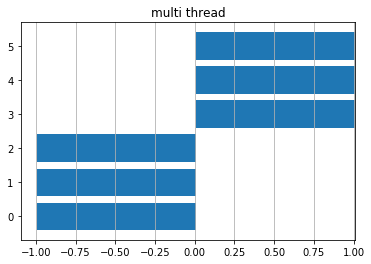

In [8]:
visiualize(multiProcess(download,urls,3),"multi process")

unknown url type: 'www.baidu.com'unknown url type: 'www.baidu.com'unknown url type: 'www.baidu.com'


unknown url type: 'www.baidu.com'unknown url type: 'www.baidu.com'

unknown url type: 'www.baidu.com'


2.0077829360961914

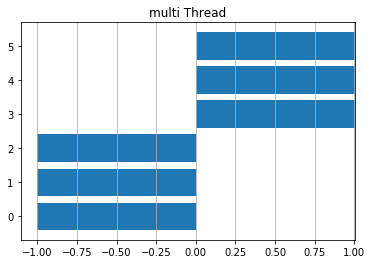

In [26]:
visiualize(multiThread(download,urls,3),"multi Thread")

In [29]:
res2 = list(((1, 2), (3, 4)))

In [31]:
s,e = np.array(list(res2)).T

In [36]:
[i for i in range(len(s))]

[0, 1]

# IO HEAVY

In [9]:
def io_heavy(text,base):
    start = time.time()-base
    f=open('output.txt','wt',encoding='utf-8')
    f.write(text)
    f.close()
    stop=time.time()-base
    return start,stop

In [10]:
N=2
TEXT = ''.join(random.choice(string.ascii_lowercase) for i in range(10**7*5))

In [16]:
TEXTs = [TEXT for i in range(12)]

In [14]:
%time io_heavy(TEXT,1)

CPU times: user 16 ms, sys: 68 ms, total: 84 ms
Wall time: 83.6 ms


(1550133977.0678086, 1550133977.1513786)

1.0169475078582764

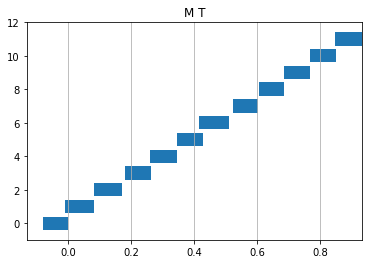

In [18]:
visiualize(multiThread(io_heavy,TEXTs,1),"M T" )

0.5004293918609619

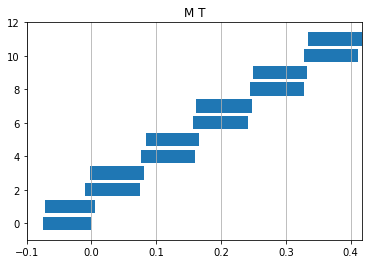

In [19]:
visiualize(multiThread(io_heavy,TEXTs,2),"M T" )

0.31836724281311035

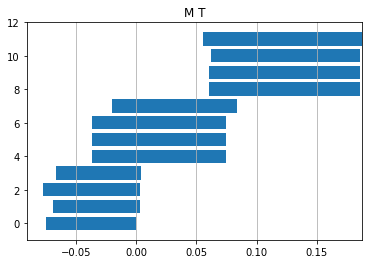

In [20]:
visiualize(multiThread(io_heavy,TEXTs,4),"M T" )

1.2489876747131348

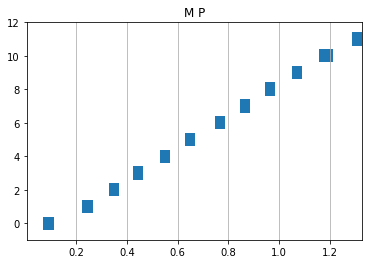

In [21]:
visiualize(multiProcess(io_heavy,TEXTs,1),"M P" )

0.8330049514770508

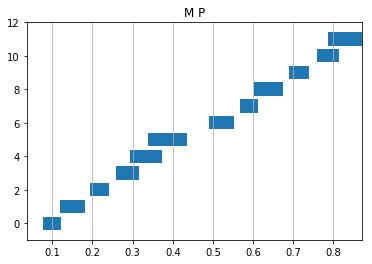

In [22]:
visiualize(multiProcess(io_heavy,TEXTs,2),"M P" )

0.7707173824310303

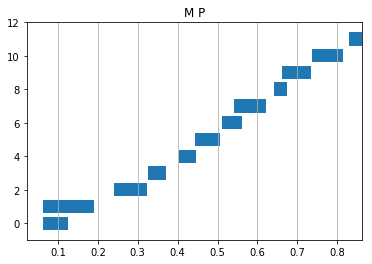

In [25]:
visiualize(multiProcess(io_heavy,TEXTs,4),"M P" )

In [37]:
%timeit x=10000**10000

7.33 ns ± 0.254 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# CPU Intensive

In [38]:
def cpu_heavy(n,base):
    start=time.time()-base
    count=0
    for i in range(n):
        count+=1
    end = time.time()-base
    return start,end

In [47]:
N = 10**7
ITERS = 10
%time [cpu_heavy(N,1) for i in range(ITERS)]

CPU times: user 3.16 s, sys: 0 ns, total: 3.16 s
Wall time: 3.16 s


[(1550135049.2834866, 1550135049.6313374),
 (1550135049.6313407, 1550135049.9345999),
 (1550135049.934603, 1550135050.2489781),
 (1550135050.2489815, 1550135050.5474892),
 (1550135050.5474925, 1550135050.8458877),
 (1550135050.8458915, 1550135051.1686869),
 (1550135051.1686902, 1550135051.4826975),
 (1550135051.4827013, 1550135051.7917063),
 (1550135051.7917092, 1550135052.1402285),
 (1550135052.1402328, 1550135052.443115)]

2.8759512901306152

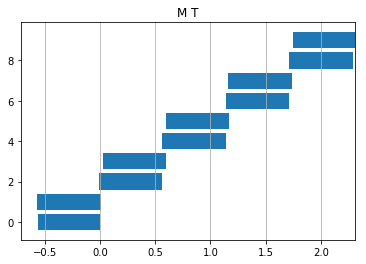

In [50]:
visiualize(multiThread(cpu_heavy,[N for i in range(ITERS)],2),"M T" )

2.706036329269409

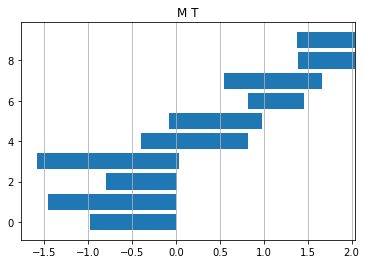

In [53]:
visiualize(multiThread(cpu_heavy,[N for i in range(ITERS)],4),"M T" )

1.5292308330535889

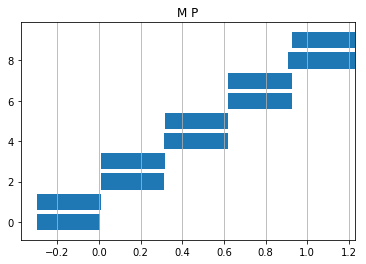

In [52]:
visiualize(multiProcess(cpu_heavy,[N for i in range(ITERS)],2),"M P" )

0.8470146656036377

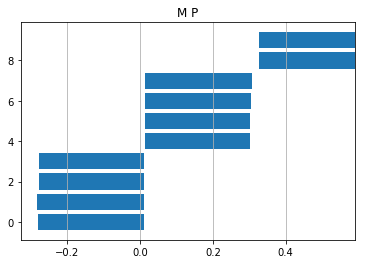

In [54]:
visiualize(multiProcess(cpu_heavy,[N for i in range(ITERS)],4),"M P" )

In [2]:
MULTITHREADING_TITLE="Multithreading"
MULTIPROCESSING_TITLE="Multiprocessing"

def visualize_runtimes(results, title):
    start,stop = np.array(results).T
    plt.barh()
    plt.barh(range(len(start)),stop-start,left=start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    return stop[-1]-start[0]

In [5]:
def multithreading(func, args, workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)
        
def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)

In [15]:
len(urls)

5

In [18]:
begin_time = time.time()
[begin_time for i in range(len(urls))]

[1550127573.1291769,
 1550127573.1291769,
 1550127573.1291769,
 1550127573.1291769,
 1550127573.1291769]

In [4]:
from urllib.request import urlopen

def download(url, base):
    start = time.time() - base
    try:
        resp = urlopen(url)
    except Exception as e:
        print ('ERROR: %s' % e)
    stop = time.time() - base
    return start,stop

In [8]:
N = 5
#URL = 'http://scholar.princeton.edu/sites/default/files/oversize_pdf_test_0.pdf'
URL ='http://www.africau.edu/images/default/sample.pdf'
urls = [URL for i in range(N)]

ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>


0.8647379875183105

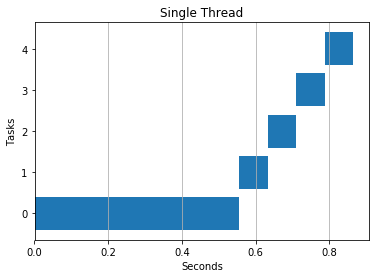

In [9]:
visualize_runtimes(multithreading(download, urls, 1), "Single Thread")

ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>


0.38410282135009766

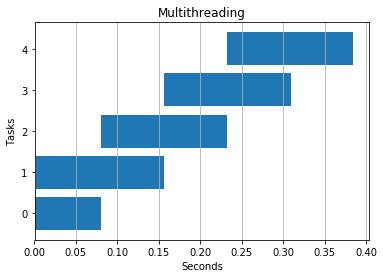

In [10]:
visualize_runtimes(multithreading(download, urls, 2),MULTITHREADING_TITLE)

ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>


0.4017467498779297

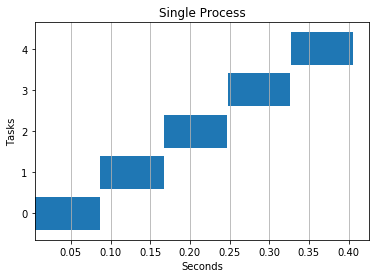

In [12]:
visualize_runtimes(multiprocessing(download, urls, 1), "Single Process")

ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>
ERROR: <urlopen error [Errno 111] Connection refused>


0.3612546920776367

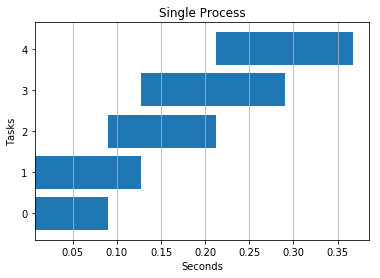

In [14]:
visualize_runtimes(multiprocessing(download, urls, 2), "Single Process")